In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data2 = pd.read_csv('cleaned_salary.csv')
data2.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,State,same_state,age,python_yn,R_yn,spark_yn,aws_yn,exel_yn
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,49,1,0,0,0,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,38,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,12,1,0,1,0,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,57,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,24,1,0,0,0,0


### 

- We are making some new columns from the 'Job Discription':

In [3]:
def title_simp(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [4]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or'lead' in title.lower() or'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
data2['job_simp'] = data2['Job Title'].apply(title_simp)
data2.job_simp.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simp, dtype: int64

In [6]:
data2['seniority'] = data2['Job Title'].apply(seniority)
data2.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [7]:
data2.rename({'houly':'hourly'},inplace=True,axis=1)

data2.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Employer Provided Salary', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'State', 'same_state', 'age', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'exel_yn', 'job_simp', 'seniority'],
      dtype='object')

In [8]:
# job Description length
data2['jobc_des'] = data2['Job Description'].apply(lambda x:len(x))
data2['jobc_des']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: jobc_des, Length: 742, dtype: int64

In [9]:
#Competitor count
data2['num_Competitors'] = data2['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)

In [10]:
# Hourly wage to anual
data2['min_salary'] = data2.apply(lambda x:x.min_salary*2 if x.hourly==1 else x.min_salary,axis=1)

In [11]:
data2[data2.hourly==1][['min_salary','max_salary','hourly']]

,min_salary,max_salary,hourly
165,34,24,1
177,42,34,1
197,36,25,1
202,42,34,1
210,30,25,1
246,34,24,1
271,42,34,1
337,36,25,1
345,48,39,1
357,42,34,1


In [12]:
data2['max_salary'] = data2.apply(lambda x:x.max_salary*2 if x.hourly==1 else x.max_salary,axis=1)
data2[data2.hourly==1][['min_salary','max_salary','hourly']]

,min_salary,max_salary,hourly
165,34,48,1
177,42,68,1
197,36,50,1
202,42,68,1
210,30,50,1
246,34,48,1
271,42,68,1
337,36,50,1
345,48,78,1
357,42,68,1


# EDA

In [13]:
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.0,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.0,2019.0
Employer Provided Salary,742.0,0.022911,0.149721,0.0,0.0,0.0,0.0,1.0
hourly,742.0,0.032345,0.177034,0.0,0.0,0.0,0.0,1.0
min_salary,742.0,74.719677,30.980593,15.0,52.0,69.5,91.0,202.0
max_salary,742.0,128.149596,45.220324,16.0,96.0,124.0,155.0,306.0
avg_salary,742.0,100.626011,38.855948,13.5,73.5,97.5,122.5,254.0
same_state,742.0,0.557951,0.496965,0.0,0.0,1.0,1.0,1.0
age,742.0,48.456873,53.900445,-1.0,13.0,26.0,61.0,278.0
python_yn,742.0,0.528302,0.499535,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

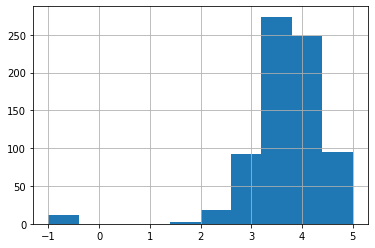

In [14]:
data2.Rating.hist()

<AxesSubplot:>

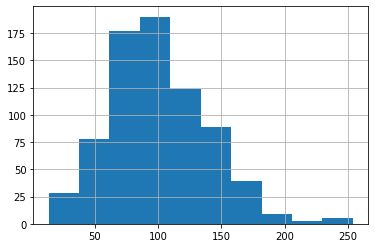

In [15]:
data2.avg_salary.hist()

In [16]:
# data2.hist(figsize=(15,8))

<AxesSubplot:>

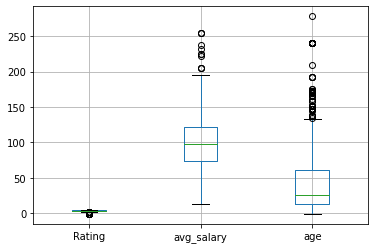

In [17]:
data2.boxplot(column = ['Rating','avg_salary','age'])

Above we can see that 'avg_salary' and 'age' has outliers

<AxesSubplot:>

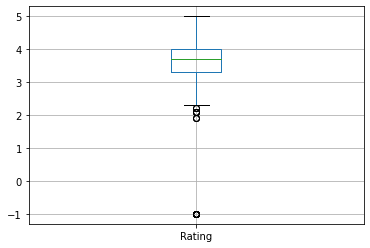

In [18]:
data2.boxplot(column = ['Rating'])

#### 

- Explring the correlation b/w the attributes:

In [19]:
data2[['Rating','avg_salary','age','jobc_des']].corr()

,Rating,avg_salary,age,jobc_des
Rating,1.000000,0.013492,0.024665,-0.012281
avg_salary,0.013492,1.000000,0.019492,0.078808
age,0.024665,0.019492,1.000000,0.164461
jobc_des,-0.012281,0.078808,0.164461,1.000000


<AxesSubplot:>

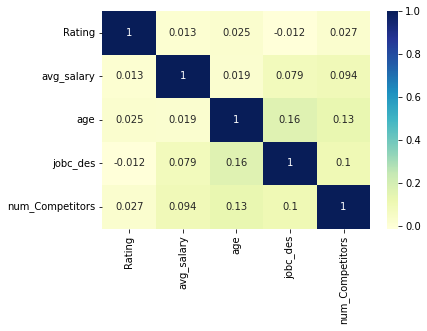

In [20]:
dataplot = sns.heatmap(data2[['Rating','avg_salary','age','jobc_des','num_Competitors']].corr(), cmap="YlGnBu", annot=True)
dataplot

##### 

- Exploring the Categorical attributes

In [21]:
# Creating new DataFrame
df_cat = data2[['Location', 'Headquarters','Size','Type of ownership', 'Industry', 'Sector','Revenue','company_txt', 'State','same_state','python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'exel_yn', 'job_simp',
       'seniority']]

In [22]:
import matplotlib.pyplot as plt

Graph fpr Location total = 20


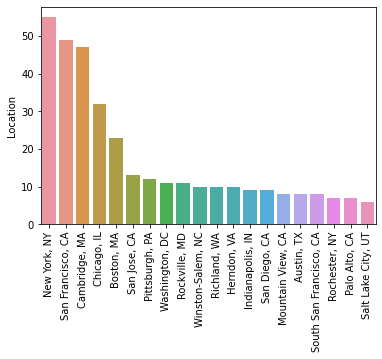

Graph fpr Headquarters total = 20


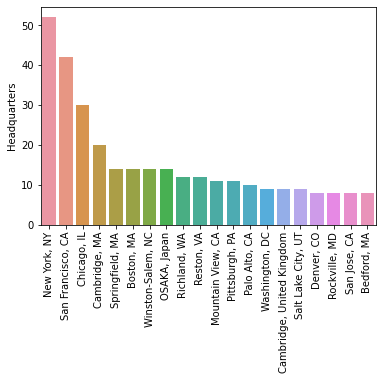

Graph fpr company_txt total = 20


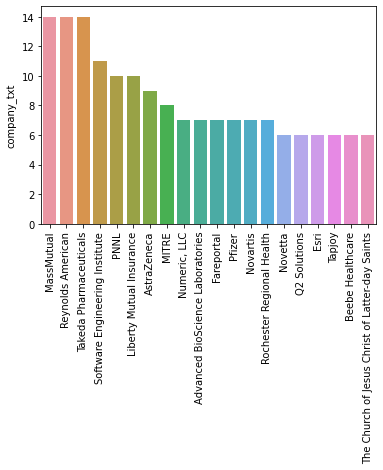

In [23]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num=df_cat[i].value_counts()[:20]
    print('Graph fpr %s total = %d' %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

##### 

- Creating Pivot tables:

In [24]:
pd.pivot_table(data2,index=['job_simp','seniority'],values = 'avg_salary')

avg_salary
job_simp         seniority            
analyst          jr          56.500000
                 na          61.155405
                 senior      79.092593
data engineer    na          96.701220
                 senior     124.689189
data scientist   jr         106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          73.988189
                 senior     109.061404

Above we can visualize that person who knows machine leaning and the data scientist have higher salaries

###### 

In [25]:
pd.pivot_table(data2,index=['State','job_simp'],values = 'avg_salary').sort_values('State',ascending=False)

avg_salary
State job_simp                  
 WI   na               54.000000
      data scientist  113.500000
      analyst          58.833333
 WA   na               97.500000
      data scientist   99.764706
...                          ...
 AZ   analyst          55.000000
      na              124.500000
 AL   na               43.750000
      data engineer    65.000000
      analyst          62.200000

[115 rows x 1 columns]

Above are the states wise average salary

###### 

In [26]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [27]:
pd.pivot_table(data2,index=['State','job_simp'],values = 'avg_salary').sort_values('State',ascending=False)

avg_salary
State        job_simp                    
 WI          na                 54.000000
             data scientist    113.500000
             analyst            58.833333
 WA          na                 97.500000
             data scientist     99.764706
             analyst            54.500000
 VA          na                 79.300000
             machine learning   87.000000
             data scientist    108.416667
             data engineer      96.900000
             analyst            71.583333
 UT          data engineer     100.333333
             analyst            54.750000
             data scientist    140.500000
 TX          na                 41.285714
             data scientist    100.730769
             data engineer     113.062500
 TN          data scientist     96.000000
             data engineer     100.950000
             analyst            13.500000
 SC          na                 60.500000
 RI          analyst           100.000000
 PA          machine learning  120.500000
             data engineer      91.500000
             data scientist    113.333333
             analyst            62.750000
             manager           109.666667
             na                 76.062500
 OR          data scientist     98.500000
             data engineer      73.000000
 OH          na                 91.166667
             data scientist    105.285714
             analyst            53.875000
 NY          na                 81.583333
             machine learning  125.000000
             data scientist    115.250000
             data engineer      86.375000
             analyst            65.607143
 NM          data scientist     74.333333
 NJ          data scientist    106.875000
             analyst            83.583333
             data engineer     112.000000
             manager           109.500000
             director          161.500000
             na                 82.500000
 NE          na                 41.000000
 NC          na                 90.916667
             data scientist    117.000000
             data engineer     104.250000
 MO          na                 72.333333
             manager            40.500000
             data scientist    127.666667
             analyst            61.000000
 MN          data engineer      95.000000
             analyst            76.000000
 MI          data scientist    106.625000
             manager            87.500000
 MD          na                 88.750000
             data scientist    109.115385
             data engineer     109.000000
             analyst            80.666667
 MA          na                107.478261
             manager            71.900000
             director          117.833333
             data scientist    113.750000
             data engineer     107.291667
             analyst            59.125000
 Los Angeles data scientist    107.500000
 LA          analyst            48.000000
             data engineer      70.500000
             na                 20.000000
 KY          na                103.500000
             data scientist     84.000000
 KS          machine learning   87.000000
 IN          na                 69.000000
             data scientist     84.500000
             data engineer     114.500000
 IL          analyst            66.500000
             na                 57.166667
             machine learning  133.000000
             director          221.750000
             data scientist    117.233333
             data engineer      96.125000
 ID          analyst            56.250000
 IA          analyst            43.000000
             data engineer     102.833333
 GA          data scientist     81.333333
             na                 80.000000
 FL          data scientist     97.357143
             data engineer      91.833333
             analyst            47.500000
 DE          na                 27.500000
 DC          data scientist    149.000000
             data engineer      85.000000

###### 

- Visualizing each column by average salary

In [28]:
df_pivots = data2[['Rating','Industry', 'Sector', 'Revenue','num_Competitors','hourly','Employer Provided Salary', 'python_yn', 'R_yn', 'spark_yn', 
           'aws_yn', 'exel_yn','Type of ownership','avg_salary']]

In [29]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values = 'avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

######  

In [30]:
pd.pivot_table(df_pivots,index='Revenue',values='avg_salary', columns='python_yn',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


Higher the revenue, lower the requirement

###### 

- **Creating WordCloud**

In [31]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

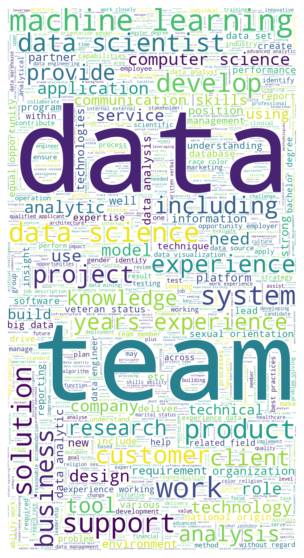

In [34]:
words = " ".join(data2['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

###### 

- Exporting all the changing we've done into different csv

In [35]:
data2.to_csv('eda_data.csv',index=False)